In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


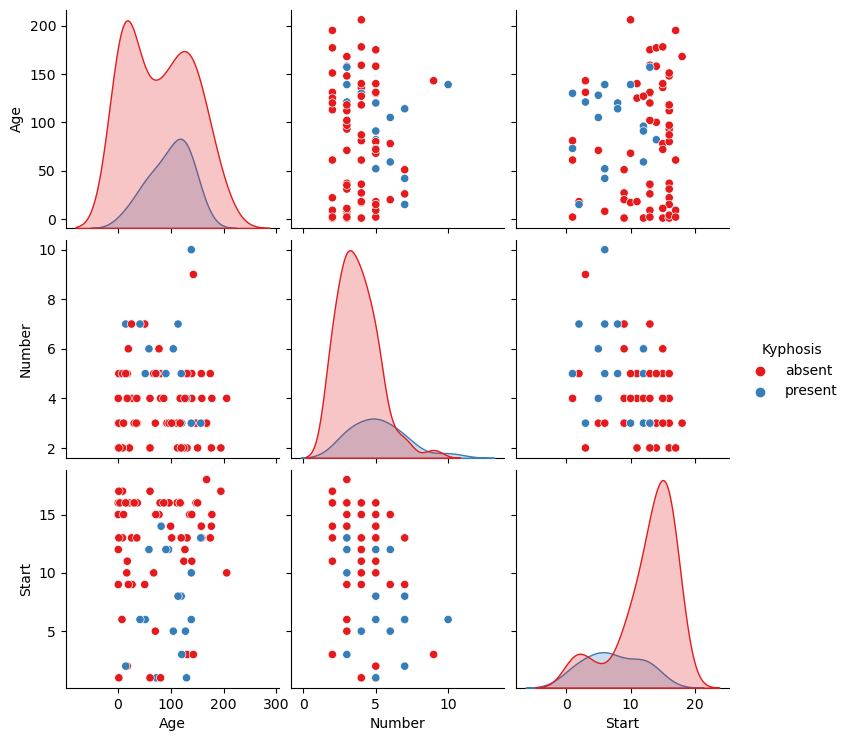

In [3]:
sns.pairplot(df,hue='Kyphosis', palette='Set1')

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [5]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)


DecisionTreeClassifier()

In [6]:
pred = dtree.predict(X_test)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      absent       1.00      0.88      0.93        24
     present       0.25      1.00      0.40         1

    accuracy                           0.88        25
   macro avg       0.62      0.94      0.67        25
weighted avg       0.97      0.88      0.91        25



In [8]:
print(confusion_matrix(y_test,pred))

[[21  3]
 [ 0  1]]


In [14]:
from IPython.display import Image
# from sklearn.externals.six import StringIO
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

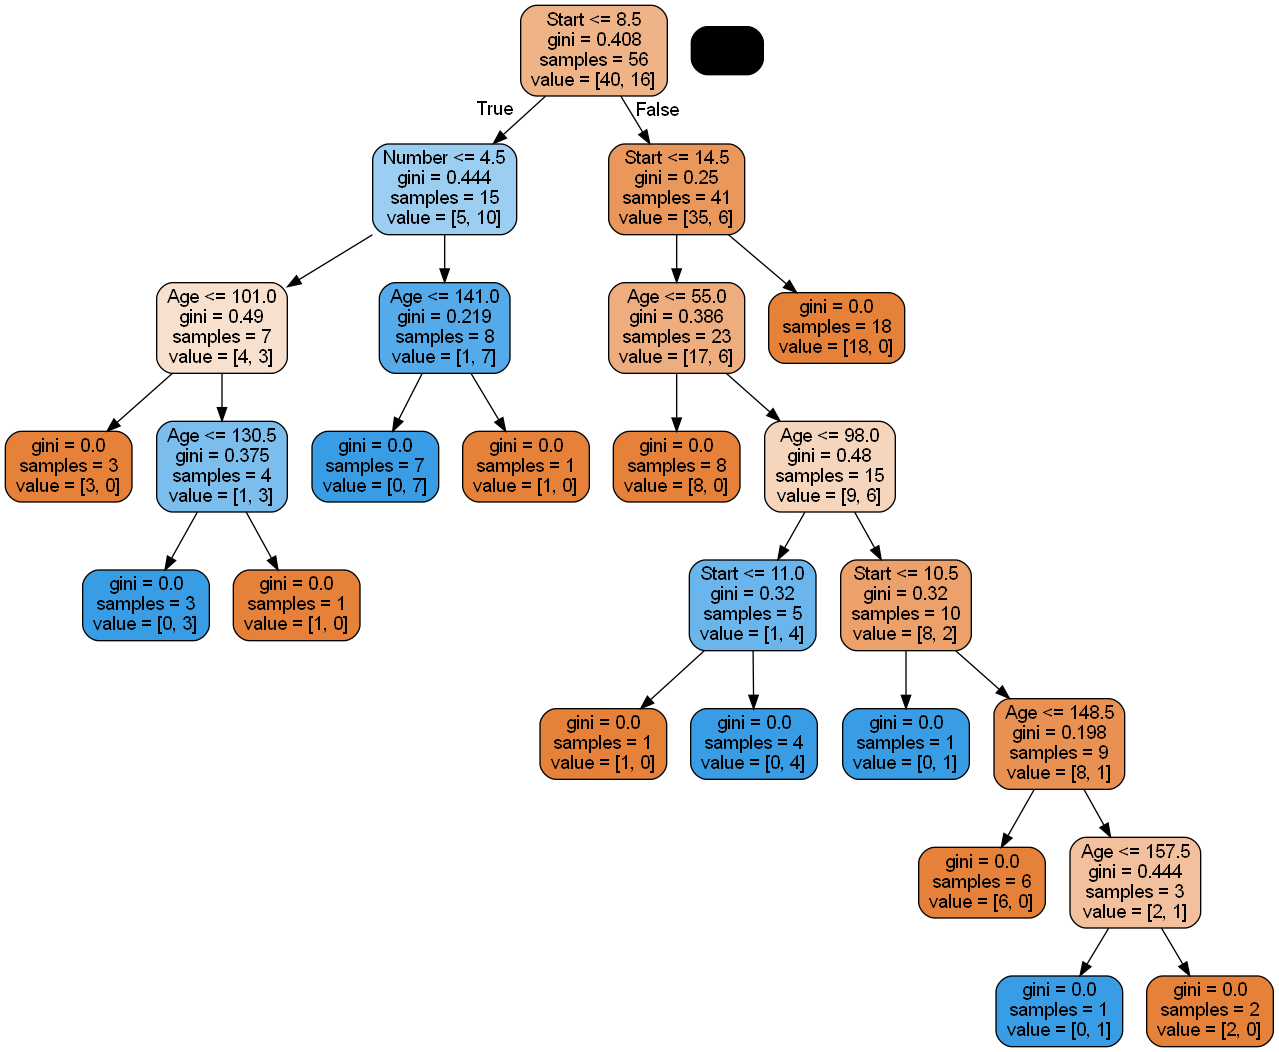

In [15]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
rfc_pred = rfc.predict(X_test)

In [18]:
print(confusion_matrix(y_test,rfc_pred))

[[23  1]
 [ 0  1]]


In [19]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       1.00      0.96      0.98        24
     present       0.50      1.00      0.67         1

    accuracy                           0.96        25
   macro avg       0.75      0.98      0.82        25
weighted avg       0.98      0.96      0.97        25



In [21]:
type(y_test)

pandas.core.series.Series